# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [1]:
# Your code here
import pandas as pd
# read in data as dataframe
data = pd.read_csv('otto_group.csv', index_col=0)

In [2]:
# Your code here
import numpy as np
# check entire dataframe for missing values
np.sum(data.isna().sum())

0

In [3]:
# Your code here
# print avg, min and max of descriptive stats for features
for row in data.describe().index:
    print(f'Average {row}: {np.mean(data.describe().loc[row, :])}, Min: {np.min(data.describe().loc[row, :])}, Max: {np.max(data.describe().loc[row, :])}')

Average count: 61878.0, Min: 61878.0, Max: 61878.0
Average mean: 0.6253788672611768, Min: 0.02569572384369243, Max: 2.897653447105595
Average std: 2.093100968979564, Min: 0.21533346700753905, Max: 5.783232652345424
Average min: 0.0, Min: 0.0, Max: 0.0
Average 25%: 0.0, Min: 0.0, Max: 0.0
Average 50%: 0.043010752688172046, Min: 0.0, Max: 1.0
Average 75%: 0.40860215053763443, Min: 0.0, Max: 4.0
Average max: 63.11827956989247, Min: 10.0, Max: 352.0


In [4]:
# Your code here
# what are the classes?
np.unique(data.target)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [5]:
# Your code here
# what is the distribution of the target?
data.target.value_counts(normalize=True)

Class_2    0.260545
Class_6    0.228433
Class_8    0.136785
Class_3    0.129351
Class_9    0.080077
Class_7    0.045881
Class_5    0.044265
Class_4    0.043489
Class_1    0.031174
Name: target, dtype: float64

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

In [ ]:
# Your code here

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [ ]:
# Your code here

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

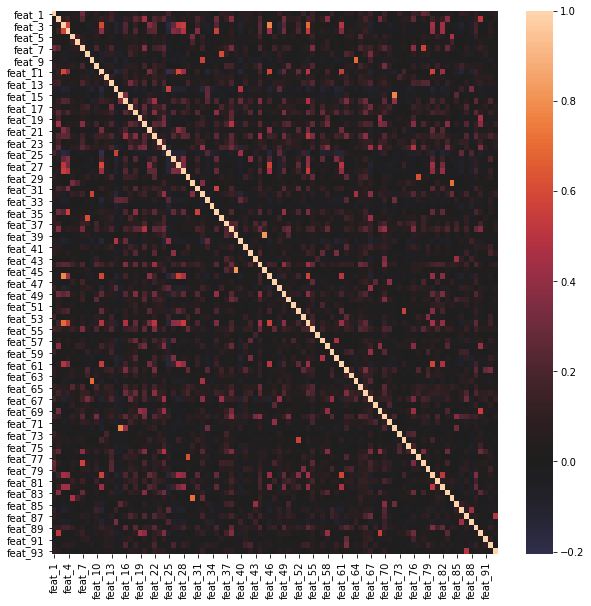

In [15]:
# Your code here

# imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# select features only
features = data.drop(['target'], axis=1)
# feat = data.loc[:, 'feat_1':'feat_93']

# set up figure & axes, and plot heatmap of correlations between features
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(features.corr(), center=0);

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [21]:
# Your code here

# imports for modeling
from sklearn.decomposition import PCA

# start with no features, and add 1 each time
for n in range(len(features)):
    # instantiate PCA with 1 more than n features (because n starts at 0)
    pca = PCA(n_components=n+1)
    # fit PCA to features
    pca.fit(features)
    # if the total explained variance is greater than or equal to 0.8, break
    if np.cumsum(pca.explained_variance_ratio_)[n] >= 0.8:
        break
    else:
        continue

print(f'Number of features kept: {n}')

Number of features kept: 26


## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [22]:
# Your code here

# import for train test split
from sklearn.model_selection import train_test_split

# split data into features and target
X = features
y = data.target.copy()

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [23]:
# Your code here

# check results
pd.concat([X_train, y_train], axis =1).head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
28590,0,1,0,0,0,0,0,2,0,0,...,1,0,1,7,0,0,0,0,0,Class_4
37609,0,0,5,5,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,Class_6
61828,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,Class_9
26654,0,0,0,0,0,0,0,0,0,0,...,7,2,0,0,0,4,0,0,0,Class_4
25559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,Class_3


## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [24]:
# Your code here

# import pipeline, classification report and logistic regression model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# instantiate pca
pca = PCA(n_components=26, random_state=123)
# instantiate logistic regression
logreg= LogisticRegression(random_state=123)

# instantiate pipeline to apply pca, then logistic regression
pipe = Pipeline(steps=[
    ('pca', pca),
    ('logreg', logreg)
])

# fit pipeline to all training data
pipe.fit(X_train, y_train)

# make predictions on test data
y_test_preds = pipe.predict(X_test)

# print classification report
print(classification_report(y_test, y_test_preds))

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Class_1       0.43      0.14      0.21       795
     Class_2       0.62      0.89      0.73      6456
     Class_3       0.50      0.23      0.31      3141
     Class_4       0.71      0.17      0.28      1070
     Class_5       0.95      0.92      0.94      1085
     Class_6       0.90      0.91      0.90      5694
     Class_7       0.64      0.45      0.53      1107
     Class_8       0.75      0.88      0.81      3370
     Class_9       0.79      0.79      0.79      2034

    accuracy                           0.73     24752
   macro avg       0.70      0.60      0.61     24752
weighted avg       0.71      0.73      0.70     24752



## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [25]:
# Your code here
# import models
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# instantiate models
svc = LinearSVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

for name, model in zip(
    ['Support Vector Machine', 'Decision Tree', 'Random Forest'],
    [svc, dt, rf]
):
    # build pipeline with pca followed by classifier
    pipe = Pipeline(steps=[
        ('pca', pca),
        ('clf', model)
    ])
    
    # fit to training data
    pipe.fit(X_train, y_train)
    
    # score on test data & print results
    print(f'{name} accuracy: {pipe.score(X_test, y_test)}')

# ⏰ This cell may take several minutes to run

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Support Vector Machine accuracy: 0.7135585003232062
Decision Tree accuracy: 0.6696428571428571
Random Forest accuracy: 0.7715336134453782


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [29]:
# Your code here 
# imports
from sklearn.model_selection import GridSearchCV

# build pipeline for pca + random forest
rf_pipe = Pipeline(steps=[
        ('pca', pca),
        ('rf', rf)
    ])

# create parameter grid
param_grid = [
    {'rf__n_estimators': [20, 100, 300], # default is 100
     'rf__max_depth': [1, None], # default is None
     'rf__min_samples_split': [2, 1000], # default is 2
     'rf__class_weight': [None, 'balanced'], # default is None
     'rf__max_samples': [0.5, None], # default is None (which means features.shape[0])
     'rf__random_state': [123]} # set random_state for all models
]

# instantiate grid search with cross-validation
grid_search = GridSearchCV(rf_pipe, param_grid)

# fit to training data
grid_search.fit(X_train, y_train)

# print abbreviated results
print(f'Best score: {grid_search.best_score_}')
print(f'Best model parameters: {grid_search.best_estimator_}')

Best score: 0.7675215028460383
Best model parameters: Pipeline(steps=[('pca', PCA(n_components=26, random_state=123)),
                ('rf',
                 RandomForestClassifier(n_estimators=300, random_state=123))])


In [ ]:
# Your code here
# ⏰ This cell may take a long time to run!


Use your grid search object along with `.cv_results` to get the full result overview

In [32]:
# Your code here
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__class_weight,param_rf__max_depth,param_rf__max_samples,param_rf__min_samples_split,param_rf__n_estimators,param_rf__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.490174,0.030516,0.015153,0.000368,None,1,0.5,2,20,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.441691,0.446061,0.436768,0.437037,0.443771,0.441066,0.003670,33
1,1.197760,0.065064,0.038515,0.000560,None,1,0.5,2,100,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.447751,0.450370,0.432323,0.440539,0.441886,0.442574,0.006281,29
2,2.942219,0.026245,0.094628,0.002284,None,1,0.5,2,300,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.453272,0.447542,0.432997,0.437845,0.440539,0.442439,0.007173,31
3,0.488353,0.016234,0.015290,0.000597,None,1,0.5,1000,20,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.441691,0.446061,0.436768,0.437037,0.443771,0.441066,0.003670,33
4,1.167911,0.012664,0.037191,0.000920,None,1,0.5,1000,100,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.447751,0.450370,0.432323,0.440539,0.441886,0.442574,0.006281,29
5,2.943588,0.010297,0.093703,0.001363,None,1,0.5,1000,300,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.453272,0.447542,0.432997,0.437845,0.440539,0.442439,0.007173,31
6,0.573181,0.014994,0.014981,0.000081,None,1,None,2,20,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.443307,0.439057,0.436768,0.435556,0.441077,0.439153,0.002814,35
7,1.661796,0.071323,0.038666,0.000742,None,1,None,2,100,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.447886,0.447138,0.435152,0.443367,0.440808,0.442870,0.004636,27
8,4.130456,0.014666,0.094566,0.002534,None,1,None,2,300,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.454619,0.448215,0.434209,0.440943,0.439731,0.443543,0.007112,25
9,0.544354,0.008249,0.014872,0.000201,None,1,None,1000,20,123,"{'rf__class_weight': None, 'rf__max_depth': 1,...",0.443307,0.439057,0.436768,0.435556,0.441077,0.439153,0.002814,35


### AdaBoost

In [33]:
# Your code here
# ⏰ This cell may take several minutes to run

# Your code here 
# imports
from sklearn.ensemble import AdaBoostClassifier

# instantiate ADA boost classifier
ada = AdaBoostClassifier()

# build pipeline for pca + random forest
ab_pipe = Pipeline(steps=[
        ('pca', pca),
        ('ab', ada)
    ])

# create parameter grid
ab_param_grid = [
    {'ab__n_estimators': [10, 50, 100, 200], # default is 50
     'ab__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], # default is None
     'ab__random_state': [123]} # set random_state for all models
]

# instantiate grid search with cross-validation
ab_grid_search = GridSearchCV(ab_pipe, ab_param_grid)

# fit to training data
ab_grid_search.fit(X_train, y_train)

# print abbreviated results
print(f'Best score: {ab_grid_search.best_score_}')
print(f'Best model parameters: {ab_grid_search.best_estimator_}')

Best score: 0.6642247921353766
Best model parameters: Pipeline(steps=[('pca', PCA(n_components=26, random_state=123)),
                ('ab',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=123))])


Use your grid search object along with `.cv_results` to get the full result overview: 

In [34]:
# Your code here 
pd.DataFrame(ab_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ab__learning_rate,param_ab__n_estimators,param_ab__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.494526,0.016944,0.019558,0.000561,0.0001,10,123,"{'ab__learning_rate': 0.0001, 'ab__n_estimator...",0.396984,0.411582,0.402155,0.406195,0.402290,0.403841,0.004853,20
1,6.493482,0.115435,0.061167,0.000585,0.0001,50,123,"{'ab__learning_rate': 0.0001, 'ab__n_estimator...",0.396984,0.411582,0.402155,0.406195,0.405791,0.404541,0.004831,16
2,12.621099,0.157032,0.111806,0.000835,0.0001,100,123,"{'ab__learning_rate': 0.0001, 'ab__n_estimator...",0.396984,0.411582,0.402155,0.406195,0.405791,0.404541,0.004831,16
3,24.813340,0.218211,0.212798,0.002482,0.0001,200,123,"{'ab__learning_rate': 0.0001, 'ab__n_estimator...",0.396984,0.411582,0.402155,0.406195,0.405791,0.404541,0.004831,16
4,1.477967,0.037798,0.020661,0.002178,0.001,10,123,"{'ab__learning_rate': 0.001, 'ab__n_estimators...",0.396984,0.411582,0.402155,0.406195,0.405791,0.404541,0.004831,16
5,6.383075,0.069955,0.060454,0.000163,0.001,50,123,"{'ab__learning_rate': 0.001, 'ab__n_estimators...",0.399811,0.411582,0.405253,0.406195,0.405791,0.405727,0.003734,14
6,12.526995,0.074099,0.113869,0.003177,0.001,100,123,"{'ab__learning_rate': 0.001, 'ab__n_estimators...",0.399811,0.411582,0.405253,0.406195,0.405791,0.405727,0.003734,14
7,25.120752,0.183622,0.216226,0.003293,0.001,200,123,"{'ab__learning_rate': 0.001, 'ab__n_estimators...",0.413278,0.411987,0.405253,0.406195,0.409832,0.409309,0.003141,12
8,1.541939,0.042386,0.019529,0.000389,0.01,10,123,"{'ab__learning_rate': 0.01, 'ab__n_estimators'...",0.407083,0.411582,0.405253,0.406195,0.405791,0.407181,0.002281,13
9,6.446026,0.046170,0.062143,0.001926,0.01,50,123,"{'ab__learning_rate': 0.01, 'ab__n_estimators'...",0.420953,0.419394,0.414949,0.418047,0.435421,0.421753,0.007114,11


### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [ ]:
# Your code here
# ⏰ This cell may take a very long time to run!

Use your grid search object along with `.cv_results` to get the full result overview: 

In [ ]:
# Your code here 

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?